<a href="https://colab.research.google.com/github/OmdenaAI/SudanChapter_AnalyzeHealthcareAccessibility/blob/main/EDA_socio_economic_and_demographic_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sudan Socio-economic and demographic data analysis**

This colab notebook is based on merged dataset by socio-economic and demographic data collection team and the dataset contains over 5,000 indicators tracked from the 1950s to 2023.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Reading the dataset
file_path = '/content/drive/My Drive/Final Dataset Socio-economic and demographic/Final Demographics.csv'
data = pd.read_csv(file_path)
data.head()

,Country,Location code,ISO3 Alpha-code,ISO2 Alpha-code,Type,Parent code,indicator,gender,quintile,ages,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Sudan,729,SDN,SD,Country/Area,912,Administration of a nationally representative...,unknown,9,NaN,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,Sudan,729,SDN,SD,Country/Area,912,Administration of a nationally representative...,unknown,9,NaN,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,Sudan,729,SDN,SD,Country/Area,912,Administration of a nationally-representative...,unknown,9,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Sudan,729,SDN,SD,Country/Area,912,Administration of a nationally-representative...,unknown,9,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Sudan,729,SDN,SD,Country/Area,912,Administration of a nationally-representative...,unknown,9,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Summary of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 86 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   5044 non-null   object 
 1   Location code             5044 non-null   int64  
 2   ISO3 Alpha-code           5044 non-null   object 
 3   ISO2 Alpha-code           5044 non-null   object 
 4   Type                      5044 non-null   object 
 5   Parent code               5044 non-null   int64  
 6   indicator                 5043 non-null   object 
 7   gender                    5044 non-null   object 
 8   quintile                  5044 non-null   int64  
 9   ages                      1250 non-null   object 
 10  values are in percentage  5044 non-null   bool   
 11  non-zero-year-columns     5044 non-null   int64  
 12  1950                      5044 non-null   float64
 13  1951                      5044 non-null   float64
 14  1952    

In [ ]:
# Analysing the unique values in 'indicator' column
value_counts = data['indicator'].value_counts()
print(value_counts)

indicator
 Administration of a nationally representative learning assessment in Grade 2 or 3 in mathematics (number)                                    1
Out-of-school rate for youth of upper secondary school age, both sexes (%)                                                                    1
Out-of-school rate for youth of upper secondary school age, fourth quintile, adjusted location parity index (household survey data) (LPIA)    1
Out-of-school rate for youth of upper secondary school age, fourth quintile, adjusted gender parity index (household survey data) (GPIA)      1
Out-of-school rate for youth of upper secondary school age, female, adjusted wealth parity index (household survey data) (WPIA)               1
                                                                                                                                             ..
Computer, communications and other services (% of commercial service exports)                                                 

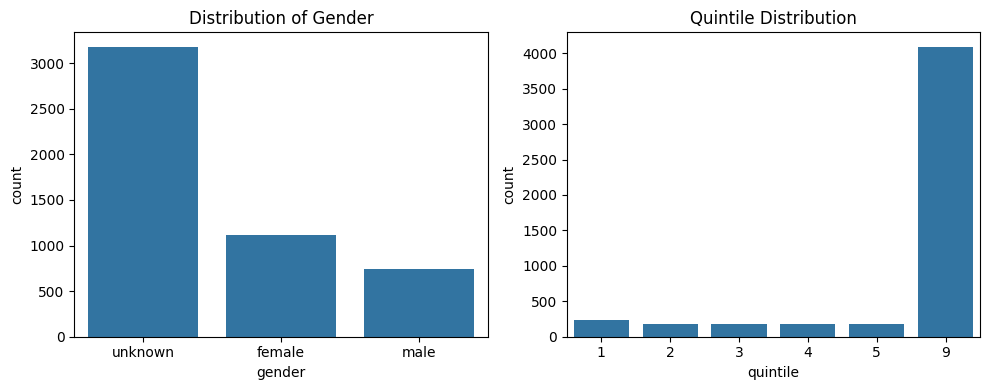

In [ ]:
# Understanding Distribution of 'Gender' and 'Quintile' column
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.countplot(x='gender', data=data, ax=axes[0])
axes[0].set_title('Distribution of Gender')
sns.countplot(x='quintile', data=data, ax=axes[1])
axes[1].set_title('Quintile Distribution')
plt.tight_layout()
plt.show()

In [ ]:
# Convert from wide to long format
id_vars = ['Country', 'indicator', 'ages', 'gender', 'quintile', 'values are in percentage', 'non-zero-year-columns']
df_long = pd.melt(data, id_vars=id_vars, var_name='Year', value_name='Value')
# Convert 'Year' to integer
df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')
df_long.head()

,Country,indicator,ages,gender,quintile,values are in percentage,non-zero-year-columns,Year,Value
0,Sudan,Administration of a nationally representative...,NaN,unknown,9,False,5,NaN,729
1,Sudan,Administration of a nationally representative...,NaN,unknown,9,False,5,NaN,729
2,Sudan,Administration of a nationally-representative...,NaN,unknown,9,False,0,NaN,729
3,Sudan,Administration of a nationally-representative...,NaN,unknown,9,False,0,NaN,729
4,Sudan,Administration of a nationally-representative...,NaN,unknown,9,False,0,NaN,729


In [ ]:
# Analysing the unique values in 'year' column
unique_values = df_long['Year'].unique()
unique_values

array([  nan, 1950., 1951., 1952., 1953., 1954., 1955., 1956., 1957.,
       1958., 1959., 1960., 1961., 1962., 1963., 1964., 1965., 1966.,
       1967., 1968., 1969., 1970., 1971., 1972., 1973., 1974., 1975.,
       1976., 1977., 1978., 1979., 1980., 1981., 1982., 1983., 1984.,
       1985., 1986., 1987., 1988., 1989., 1990., 1991., 1992., 1993.,
       1994., 1995., 1996., 1997., 1998., 1999., 2000., 2001., 2002.,
       2003., 2004., 2005., 2006., 2007., 2008., 2009., 2010., 2011.,
       2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019., 2020.,
       2021., 2022., 2023.])

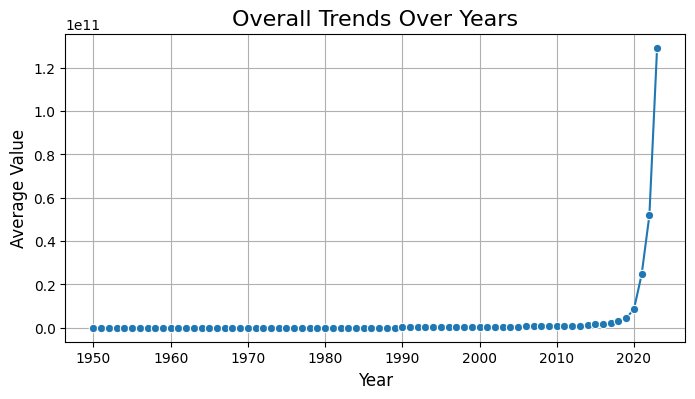

In [ ]:
# Understanding overall trends over year by grouping and calculating mean value for each year
yearly_trends = df_long.groupby('Year')['Value'].mean()
plt.figure(figsize=(8, 4))
sns.lineplot(data=yearly_trends, marker="o")
plt.title('Overall Trends Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.grid(True)
plt.show()

Key Observations:
*   There is a drastic surge in the average value starting around 2015–2020, leading to a sharp exponential rise.
*   From 1950 to roughly 2010, the average value remains nearly constant, close to zero.

# **Analysing indicators - Rural population & Urban Population**

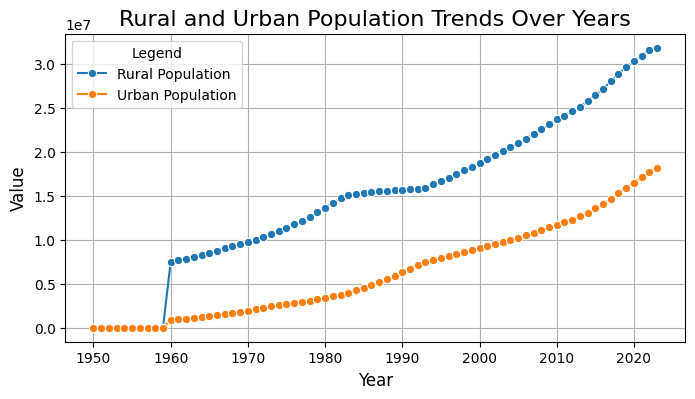

In [ ]:
rural_population = df_long[df_long['indicator'] == 'Rural population'].copy()
urban_population = df_long[df_long['indicator'] == 'Urban population'].copy()

# Convert 'Year' column to numeric and drop rows with missing values
for df in [rural_population, urban_population]:
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
    df.dropna(subset=['Year'], inplace=True)

plt.figure(figsize=(8, 4))
sns.lineplot(data=rural_population, x='Year', y='Value', marker="o", label='Rural Population')
sns.lineplot(data=urban_population, x='Year', y='Value', marker="o", label='Urban Population')
plt.title('Rural and Urban Population Trends Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(title='Legend', loc='upper left')
plt.grid(True)
plt.show()

Key Observations:



*   Increasing Trend for Both Populations:Both rural and urban populations show a steady increase over the years, reflecting overall population growth.
*   Rural Population Dominance: The rural population consistently remains higher than the urban population throughout the observed period, highlighting a predominantly rural demographic.


# **Analysing Indicator - Labor force**



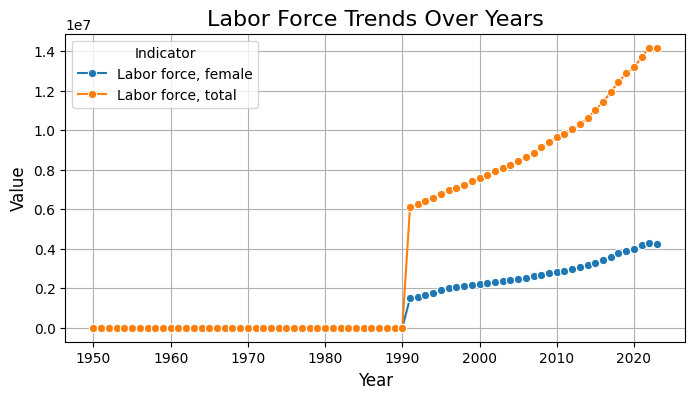

In [ ]:
# Filter for the desired indicators
labor_force_female = df_long[df_long['indicator'] == 'Labor force, female'].copy()
labor_force_total = df_long[df_long['indicator'] == 'Labor force, total'].copy()

# Convert 'Year' column to numeric, handling errors
for df in [labor_force_female, labor_force_total]:
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
    df.dropna(subset=['Year'], inplace=True)

plt.figure(figsize=(8, 4))
sns.lineplot(data=labor_force_female, x='Year', y='Value', marker='o', label='Labor force, female')
sns.lineplot(data=labor_force_total, x='Year', y='Value', marker='o', label='Labor force, total')
plt.title('Labor Force Trends Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(title='Indicator', loc='upper left')
plt.grid(True)
plt.show()

Key Observation:


*   Growing labor force often signifies economic expansion and increased job opportunities.
*   The increase in female participation suggests greater gender inclusivity in the workforce, reflecting societal progress toward equality.




# **Analysing Indicator - Access to anti-retroviral drugs**

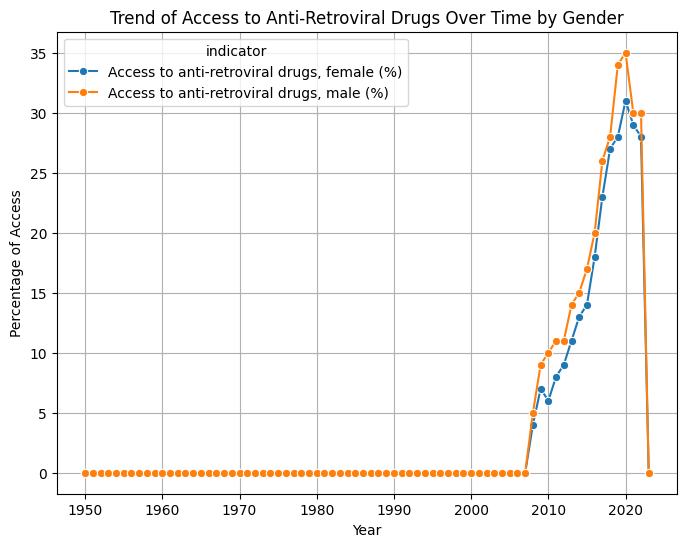

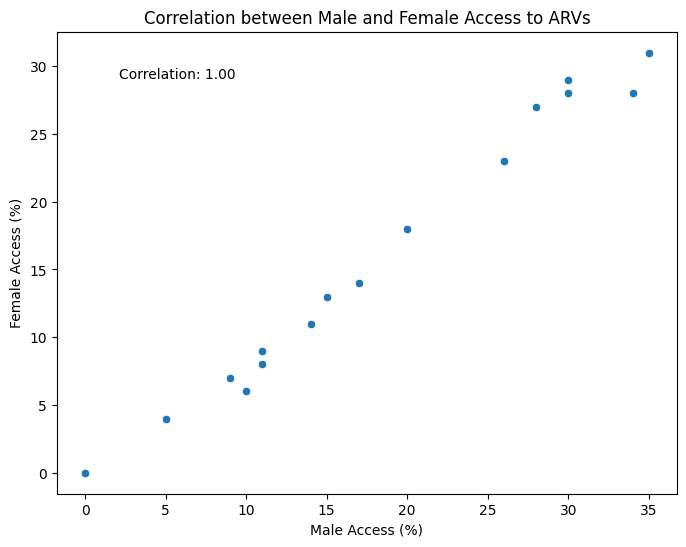

In [ ]:
# Filter data for the two anti-retroviral indicators
arvs_data = df_long[df_long['indicator'].isin(['Access to anti-retroviral drugs, female (%)',
                                         'Access to anti-retroviral drugs, male (%)'])].copy()

# Convert 'Year' to numeric before plotting, handling errors correctly
arvs_data['Year'] = pd.to_numeric(arvs_data['Year'], errors='coerce')
arvs_data.loc[:, 'Year'] = pd.to_numeric(arvs_data['Year'], errors='coerce')
arvs_data.dropna(subset=['Year'], inplace=True)

# 1. Trend over time for each gender:
plt.figure(figsize=(8, 6))
sns.lineplot(data=arvs_data, x='Year', y='Value', hue='indicator', marker='o')
plt.title('Trend of Access to Anti-Retroviral Drugs Over Time by Gender')
plt.xlabel('Year')
plt.ylabel('Percentage of Access')
plt.grid(True)
plt.show()

# 2. Correlation between Male and Female Access:
male_access = arvs_data[arvs_data['indicator'] == 'Access to anti-retroviral drugs, male (%)']
female_access = arvs_data[arvs_data['indicator'] == 'Access to anti-retroviral drugs, female (%)']
merged_access = pd.merge(male_access, female_access, on=['Country', 'Year'], suffixes=('_male', '_female'))
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_access, x='Value_male', y='Value_female')
plt.title('Correlation between Male and Female Access to ARVs')
plt.xlabel('Male Access (%)')
plt.ylabel('Female Access (%)')

# Calculate and print the correlation
correlation = merged_access['Value_male'].corr(merged_access['Value_female'])
plt.text(0.1, 0.9, f"Correlation: {correlation:.2f}", transform=plt.gca().transAxes) # Display correlation on the plot
plt.show()


Key Observations:



*   The highest percentage of access for both genders reaches around 35%.
*   Despite a similar upward trend, males seem to have a slightly higher percentage of access than females toward the end of the timeline
*   Correlation of 1 shows Male and female populations might be facing similar levels of HIV prevalence, prompting equal efforts to provide ARV access.




# Analysing Health Indicators

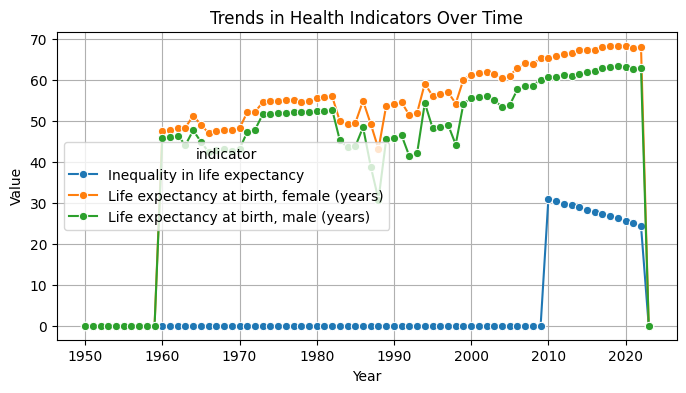

In [ ]:
# Filter for the specified health indicators
health_indicators = df_long[df_long['indicator'].isin([
    'Inequality in life expectancy',
    'Life expectancy at birth, female (years)',
    'Life expectancy at birth, male (years)'
])].copy()

# Convert 'Year' to numeric, handling errors
health_indicators['Year'] = pd.to_numeric(health_indicators['Year'], errors='coerce')
health_indicators.dropna(subset=['Year'], inplace=True)
plt.figure(figsize=(8, 4))
sns.lineplot(data=health_indicators, x='Year', y='Value', hue='indicator', marker='o')
plt.title('Trends in Health Indicators Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid(True)
plt.show()

Key Observation:


*   The increase in life expectancy for both genders suggests advancements in health care, living conditions, and overall societal well-being.
*  The persistent level of inequality in life expectancy suggests that despite improvements in overall life expectancy, disparities may still exist based on socioeconomic factors or other determinants.



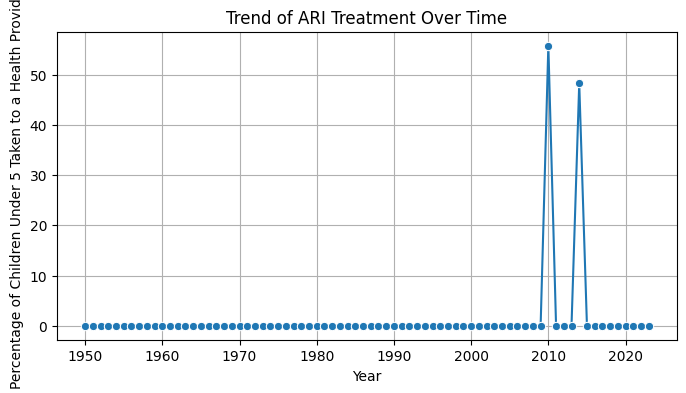

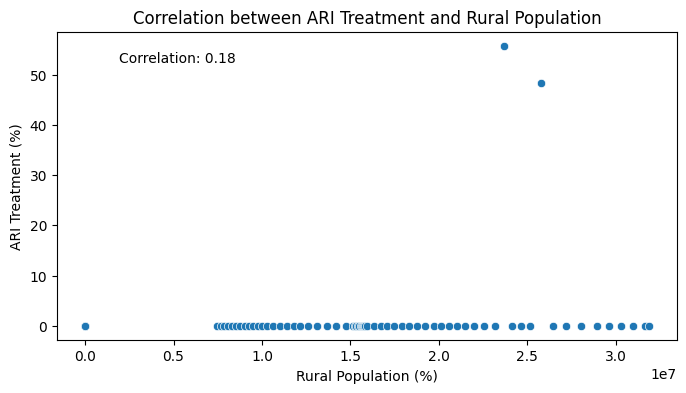

In [ ]:
# Filter data for ARI treatment indicator
ari_treatment = df_long[df_long['indicator'] == 'ARI treatment (% of children under 5 taken to a health provider)'].copy()

# Convert 'Year' to numeric, handling errors
ari_treatment['Year'] = pd.to_numeric(ari_treatment['Year'], errors='coerce')
ari_treatment.dropna(subset=['Year'], inplace=True)

# Plot trend of ARI treatment over time
plt.figure(figsize=(8, 4))
sns.lineplot(data=ari_treatment, x='Year', y='Value', marker='o')
plt.title('Trend of ARI Treatment Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of Children Under 5 Taken to a Health Provider')
plt.grid(True)
plt.show()

# Analysing ARI treatment with Rural Population
rural_pop = df_long[df_long['indicator'] == 'Rural population'].copy()
rural_pop['Year'] = pd.to_numeric(rural_pop['Year'], errors='coerce')
rural_pop.dropna(subset=['Year'], inplace=True)

merged_data = pd.merge(ari_treatment, rural_pop, on=['Country', 'Year'], suffixes=('_ari', '_rural'))
plt.figure(figsize=(8,4))
sns.scatterplot(data=merged_data, x='Value_rural', y='Value_ari')
plt.title('Correlation between ARI Treatment and Rural Population')
plt.xlabel('Rural Population (%)')
plt.ylabel('ARI Treatment (%)')

correlation = merged_data['Value_rural'].corr(merged_data['Value_ari'])
plt.text(0.1, 0.9, f"Correlation: {correlation:.2f}", transform=plt.gca().transAxes)
plt.show()

Key Observation:


*   The chart illustrates a notable trend in the treatment of ARI among children under five, highlighting a crucial shift in health care access and awareness in the early 2010s, followed by fluctuations and a return to lower rates.
*  Correlation plot demonstrates that while there may be instances of successful ARI treatment in rural populations, overall, the data reflects a weak correlation. Most children in rural areas seem to receive little to no treatment for ARI, highlighting potential gaps in healthcare access or awareness in these regions.
  

# **Immunization Coverage**

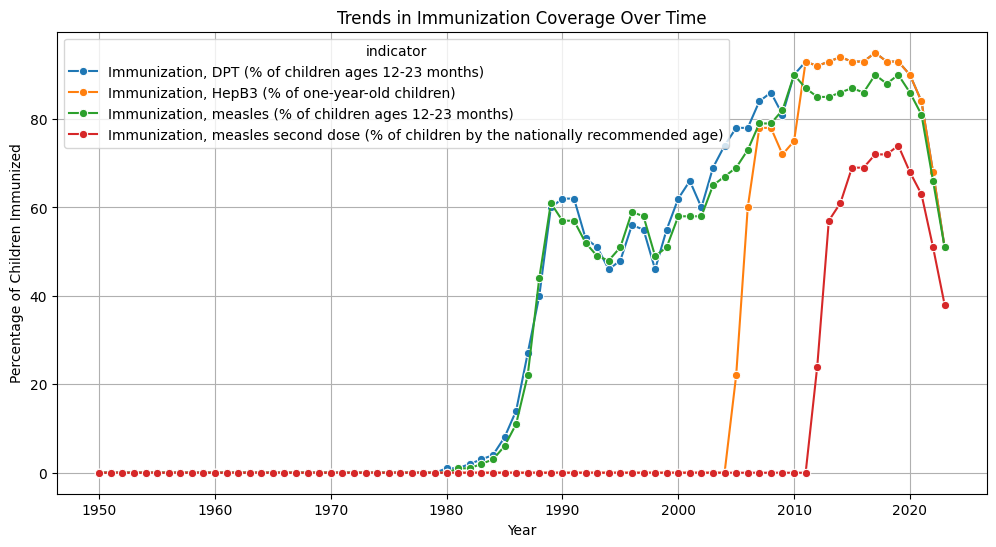

In [ ]:
# Filter for the specified immunization indicators
immunization_indicators = df_long[df_long['indicator'].isin([
    'Immunization, DPT (% of children ages 12-23 months)',
    'Immunization, HepB3 (% of one-year-old children)',
    'Immunization, measles (% of children ages 12-23 months)',
    'Immunization, measles second dose (% of children by the nationally recommended age)'
])].copy()

# Convert 'Year' to numeric, handling errors
immunization_indicators['Year'] = pd.to_numeric(immunization_indicators['Year'], errors='coerce')
immunization_indicators.dropna(subset=['Year'], inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=immunization_indicators, x='Year', y='Value', hue='indicator', marker='o')
plt.title('Trends in Immunization Coverage Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of Children Immunized')
plt.grid(True)
plt.show()

# **Analysis on sectoral Contribution to GDP: Focus on Agriculture, Forestry, and Fishing**

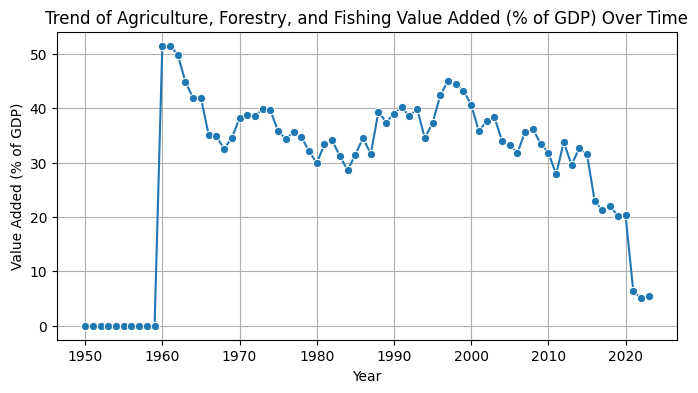

In [ ]:
# Filter data for the specific indicator
agriculture_data = df_long[df_long['indicator'] == 'Agriculture, forestry, and fishing, value added (% of GDP)'].copy()

# Convert 'Year' to numeric, handling errors
agriculture_data['Year'] = pd.to_numeric(agriculture_data['Year'], errors='coerce')
agriculture_data.dropna(subset=['Year'], inplace=True)

plt.figure(figsize=(8, 4))
sns.lineplot(data=agriculture_data, x='Year', y='Value', marker='o')
plt.title('Trend of Agriculture, Forestry, and Fishing Value Added (% of GDP) Over Time')
plt.xlabel('Year')
plt.ylabel('Value Added (% of GDP)')
plt.grid(True)
plt.show()

Key Observations:

Initial High Contribution: In the earlier years, the contribution of agriculture, forestry, and fishing to GDP was relatively high, around 50%.
This indicates that the economy was heavily reliant on these sectors, possibly due to a lack of industrialization or significant dependence on primary sector activities.

Steady Decline: Over time, there is a clear declining trend in the percentage contribution to GDP.
This suggests that as the economy grew, the importance of agriculture, forestry, and fishing relative to other sectors (like industry and services) decreased.

Temporary Fluctuations: There are periods of rises and dips in the data, possibly due to: Changes in agricultural productivity (e.g., good or bad harvests),Economic policies affecting the sector, Global or local economic shocks and Climatic conditions impacting forestry, fishing, or farming.

Sharp Declines at Specific Points: Towards the end of the graph, a steep drop is observed. This could signify - A significant shift in the economy's structure, such as rapid industrialization or a services sector boom and External shocks like natural disasters, economic crises, or major policy changes affecting agriculture.

# **Technology Penetration**

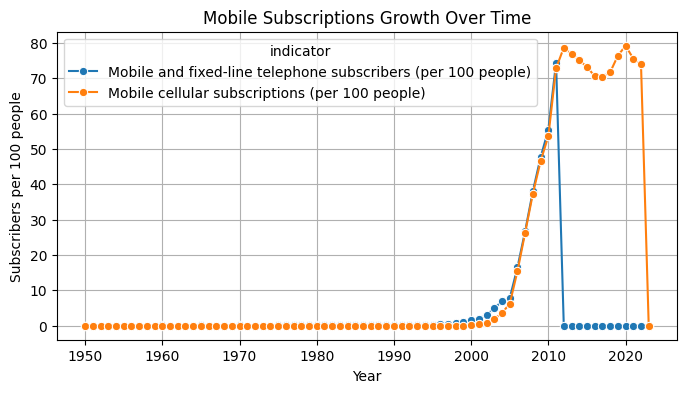

In [ ]:
# Filter data for mobile subscriptions
mobile_data = df_long[df_long['indicator'].isin([
    'Mobile cellular subscriptions (per 100 people)',
    'Mobile and fixed-line telephone subscribers (per 100 people)'
])].copy()

# Convert 'Year' to numeric, handling errors
mobile_data['Year'] = pd.to_numeric(mobile_data['Year'], errors='coerce')
mobile_data.dropna(subset=['Year'], inplace=True)

# Plotting trends for each indicator
plt.figure(figsize=(8, 4))
sns.lineplot(data=mobile_data, x='Year', y='Value', hue='indicator', marker='o')
plt.title('Mobile Subscriptions Growth Over Time')
plt.xlabel('Year')
plt.ylabel('Subscribers per 100 people')
plt.grid(True)
plt.show()

Key Observations:


Highlights the growth of mobile cellular subscriptions over the last two decades, signifying a major shift in communication methods, while fixed-line subscriptions have stabilized at a lower rate.



# Displacement Indicators

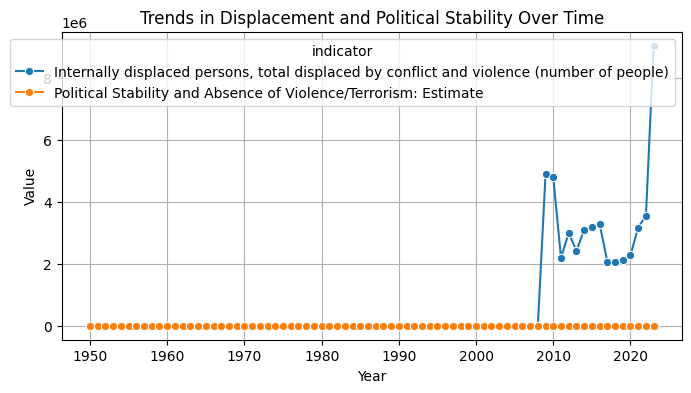

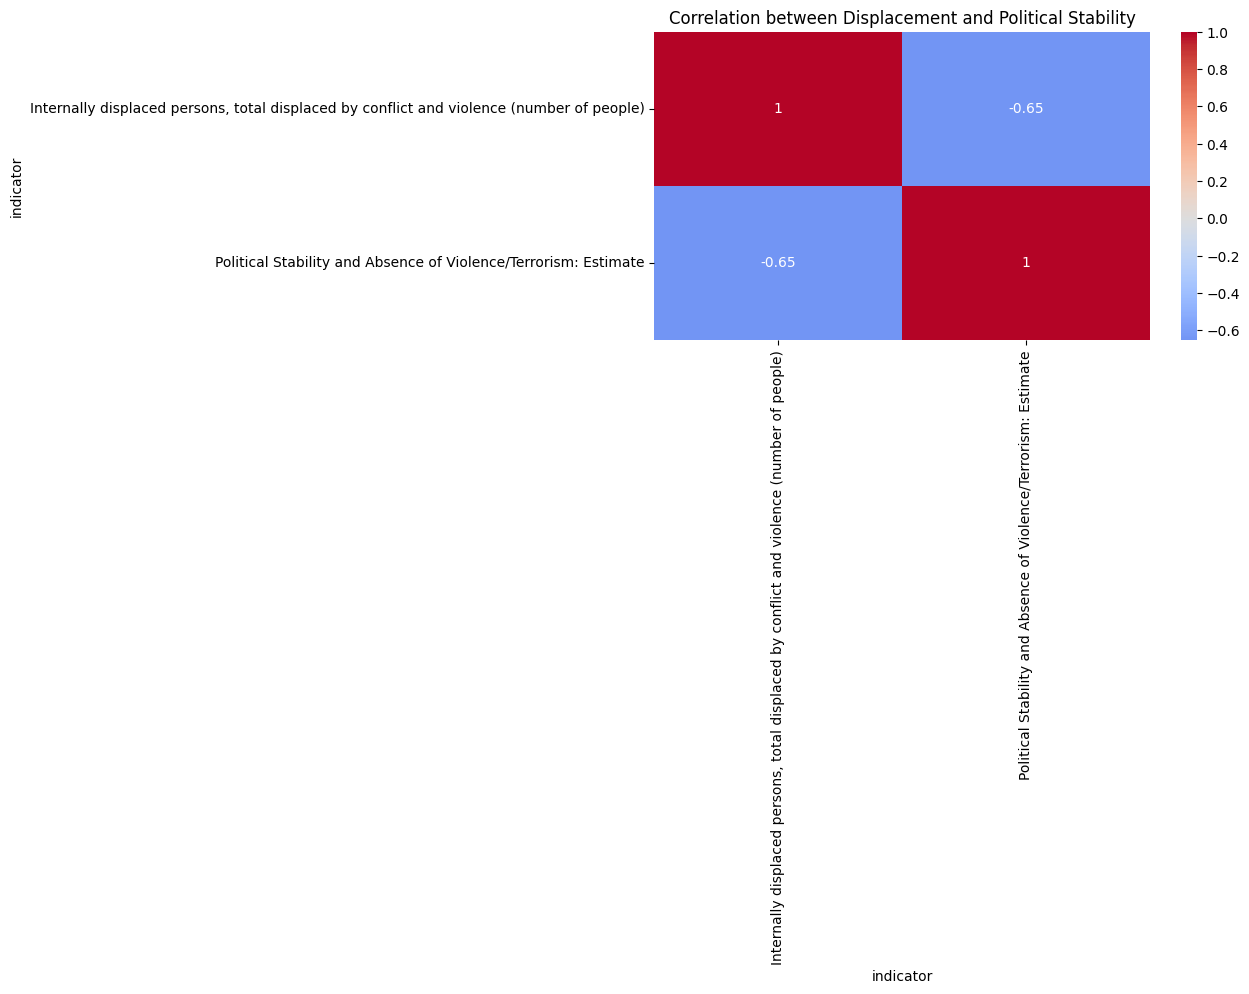

In [ ]:
# Filter for the specified displacement indicators
displacement_data = df_long[df_long['indicator'].isin([
    'Internally displaced persons, total displaced by conflict and violence (number of people)',
    'Political Stability and Absence of Violence/Terrorism: Estimate'
])].copy()

# Convert 'Year' to numeric, handling errors
displacement_data['Year'] = pd.to_numeric(displacement_data['Year'], errors='coerce')
displacement_data.dropna(subset=['Year'], inplace=True)


plt.figure(figsize=(8, 4))
sns.lineplot(data=displacement_data, x='Year', y='Value', hue='indicator', marker='o')
plt.title('Trends in Displacement and Political Stability Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Further analysis: correlation between displacement and political stability)
displacement_pivot = displacement_data.pivot(index=['Country', 'Year'], columns='indicator', values='Value')
correlation = displacement_pivot.corr()
correlation
plt.figure(figsize=(8,4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation between Displacement and Political Stability")
plt.show()

**Key Observations**

Correlation Coefficient: -0.65.This value indicates a moderate negative correlation between the two variables.
A negative correlation means that as one variable increases, the other tends to decrease.

Implication of the Negative Correlation: Higher Political Instability (lower estimates) is associated with a higher number of internally displaced persons due to conflict and violence.
